In [6]:
from datetime import datetime
import pandas as pd

series = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',
                     date_parser=lambda dates: datetime.strptime(dates, '%Y-%m'))

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from pandas.plotting import autocorrelation_plot, register_matplotlib_converters
from matplotlib import pyplot
register_matplotlib_converters()

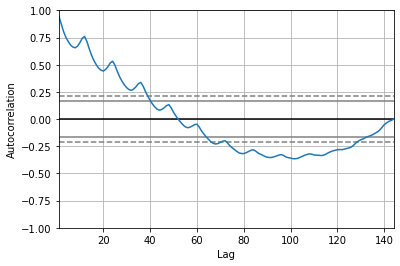

In [11]:
autocorrelation_plot(series)
pyplot.show()

In [12]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

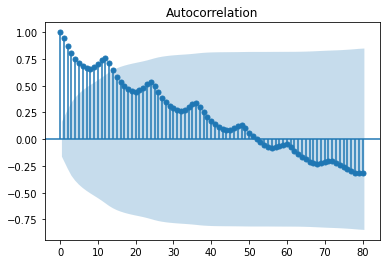

In [14]:
plot_acf(series,lags=80)
pyplot.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model = ARIMA(series, order=(2,1,2))

In [25]:
model_fit = model.fit()

In [27]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Fri, 25 Jun 2021   AIC                           1344.043
Time:                        10:02:37   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.931      0.000       1.583       1.712
ar.L2.D.#Passeng

In [28]:
model_fit.resid

Month
1949-02-01     3.468921
1949-03-01    10.649350
1949-04-01    -8.220529
1949-05-01    -8.789588
1949-06-01    15.829817
                ...    
1960-08-01     6.956902
1960-09-01   -47.146727
1960-10-01     2.982175
1960-11-01   -31.196980
1960-12-01    53.472313
Length: 143, dtype: float64

In [29]:
residuais = pd.DataFrame(model_fit.resid)

<AxesSubplot:xlabel='Month'>

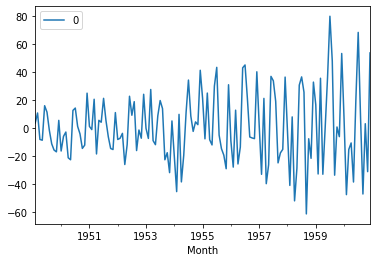

In [30]:
residuais.plot()

<AxesSubplot:ylabel='Density'>

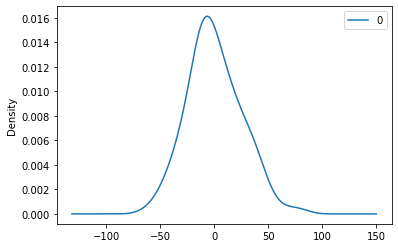

In [31]:
residuais.plot(kind='kde')

In [32]:
residuais.describe()

,0
count,143.000000
mean,0.371548
std,25.142917
min,-61.346597
25%,-15.611958
50%,-2.309136
75%,17.612464
max,79.636877


In [34]:
X  = series.values
X = X.astype('float32')

In [36]:
size = int(len(X)/2)

In [37]:
train = X[0:size]
test = X[size:]

In [61]:
history = [x for x in train]

In [62]:
predictions = list()

In [41]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(history, previsao, interval=1):
    return previsao + history[-interval]

In [63]:
for t in range(len(test)):
    meses_no_ano = 12
    diff = difference(history, meses_no_ano)

    model = ARIMA(diff, order=(1,0,1))

    model_fit = model.fit(trend='nc', disp=0)

    valor_predito = model_fit.forecast()[0]

    valor_predito = inverse_difference(history, valor_predito, meses_no_ano)

    predictions.append(valor_predito)

    valor_real = test[t]

    history.append(valor_real)

    print('Valor predito=%.3f, Valor esperdo=%3.f' % (valor_predito, valor_real))

Valor predito=228.761, Valor esperdo=242
Valor predito=221.170, Valor esperdo=233
Valor predito=275.666, Valor esperdo=267
Valor predito=259.449, Valor esperdo=269
Valor predito=272.074, Valor esperdo=270
Valor predito=299.071, Valor esperdo=315
Valor predito=347.250, Valor esperdo=364
Valor predito=349.548, Valor esperdo=347
Valor predito=312.055, Valor esperdo=312
Valor predito=280.534, Valor esperdo=274
Valor predito=248.060, Valor esperdo=237
Valor predito=263.925, Valor esperdo=278
Valor predito=286.196, Valor esperdo=284
Valor predito=274.247, Valor esperdo=277
Valor predito=309.011, Valor esperdo=317
Valor predito=315.642, Valor esperdo=313
Valor predito=313.462, Valor esperdo=318
Valor predito=360.601, Valor esperdo=374
Valor predito=418.247, Valor esperdo=413
Valor predito=396.248, Valor esperdo=405
Valor predito=366.457, Valor esperdo=355
Valor predito=319.198, Valor esperdo=306
Valor predito=271.331, Valor esperdo=271
Valor predito=311.103, Valor esperdo=306
Valor predito=31

In [64]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print("Test RMSE: %.3f" % rmse)

Test RMSE: 13.140


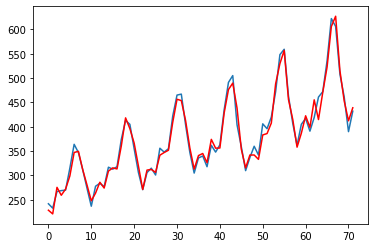

In [65]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()